In [1]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots

from src.data import load_dataset

plt.style.use(['science', 'ieee'])

X, y = load_dataset()

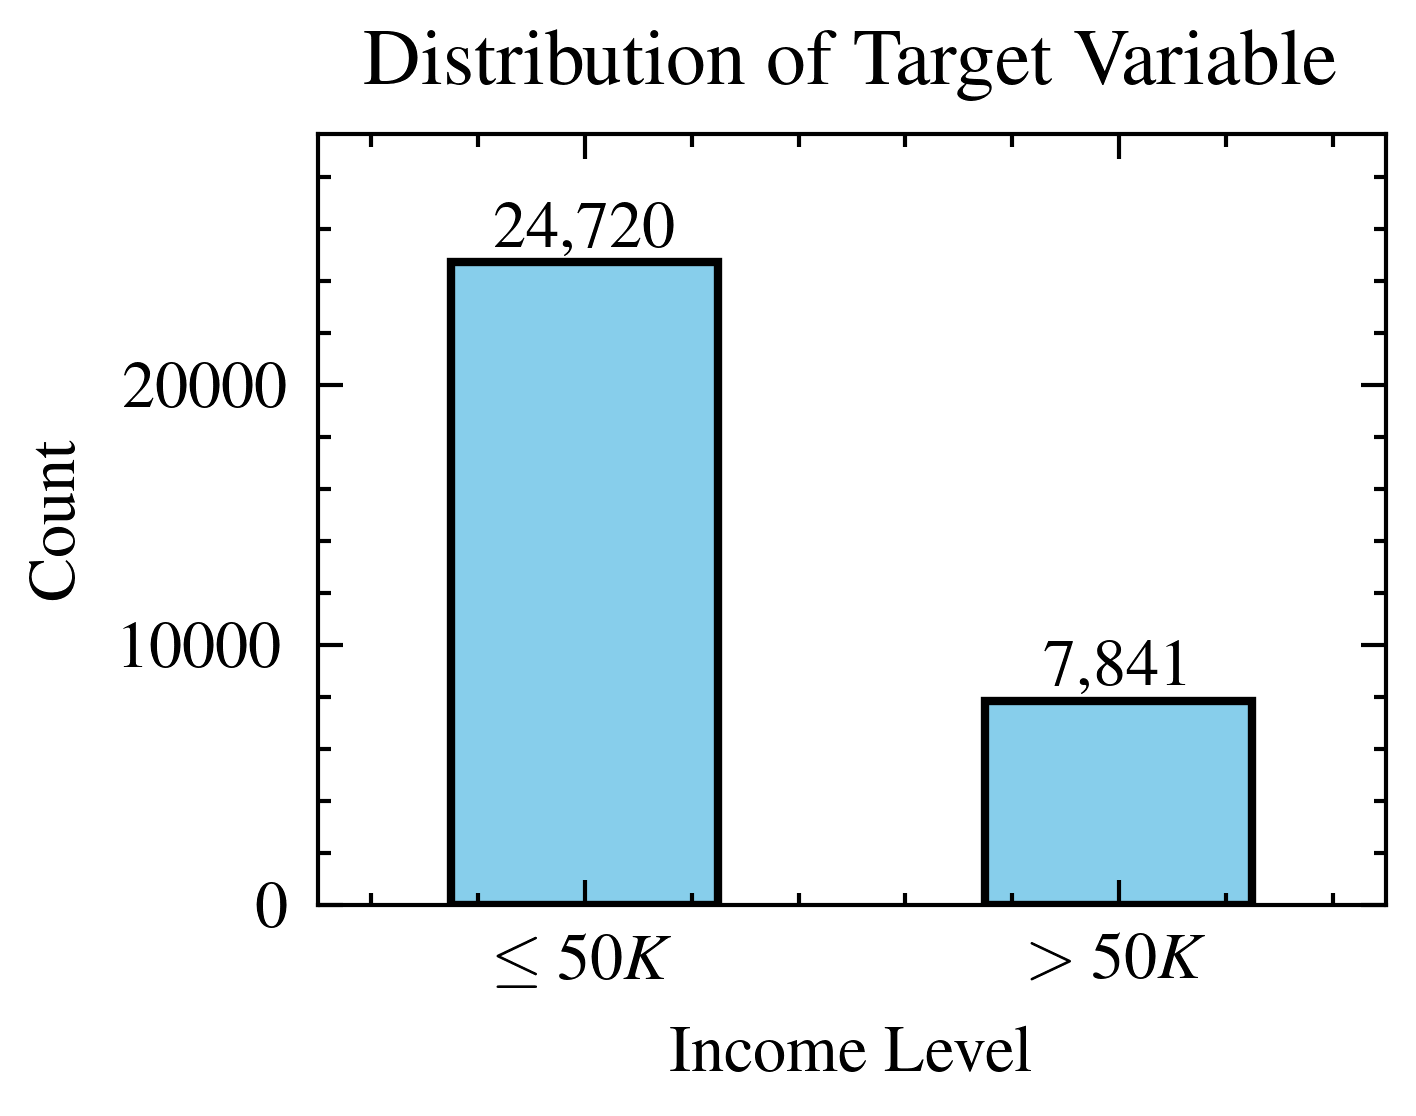

In [21]:
plt.figure(figsize=(2.5, 2))
ax = y.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Target Variable')
plt.xlabel('Income Level')
plt.ylabel('Count')

plt.xticks(ticks=[0, 1], labels=["$\leq50K$", "$>50K$"], rotation=0)
plt.ylim(0, y.value_counts().max() * 1.2)  # Set y-limit to give space for labels

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../plots/y_distribution.pdf', dpi=300)
plt.show()

In [19]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

top_features = feature_importances.nlargest(10)
print(top_features)

fnlwgt                                0.171545
age                                   0.152671
education_num                         0.113884
capital-gain                          0.103144
hours-per-week                        0.084454
marital-status_ Married-civ-spouse    0.080402
marital-status_ Never-married         0.034315
capital-loss                          0.032587
occupation_ Exec-managerial           0.020013
relationship_ Not-in-family           0.019669
dtype: float64


In [14]:
least_important_features = feature_importances.nsmallest(10)
print(least_important_features)

native-country_ Holand-Netherlands            2.380024e-08
workclass_ Never-worked                       5.276702e-06
native-country_ Honduras                      5.351179e-06
occupation_ Armed-Forces                      2.407157e-05
native-country_ Outlying-US(Guam-USVI-etc)    3.533131e-05
native-country_ Scotland                      5.791992e-05
native-country_ Thailand                      6.696628e-05
workclass_ Without-pay                        7.279698e-05
native-country_ Peru                          8.622200e-05
native-country_ Laos                          8.826218e-05
dtype: float64


<Axes: title={'center': 'fnlwgt Distribution'}, ylabel='Frequency'>

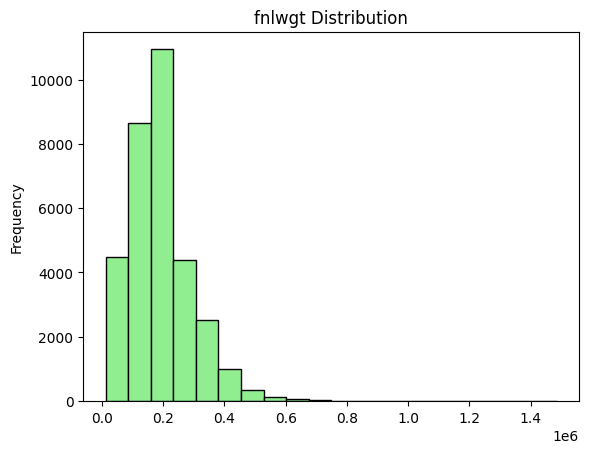

In [ ]:
X['fnlwgt'].plot(kind='hist', bins=20, title='fnlwgt Distribution', color='lightgreen', edgecolor='black')

Text(0.5, 0, 'Age')

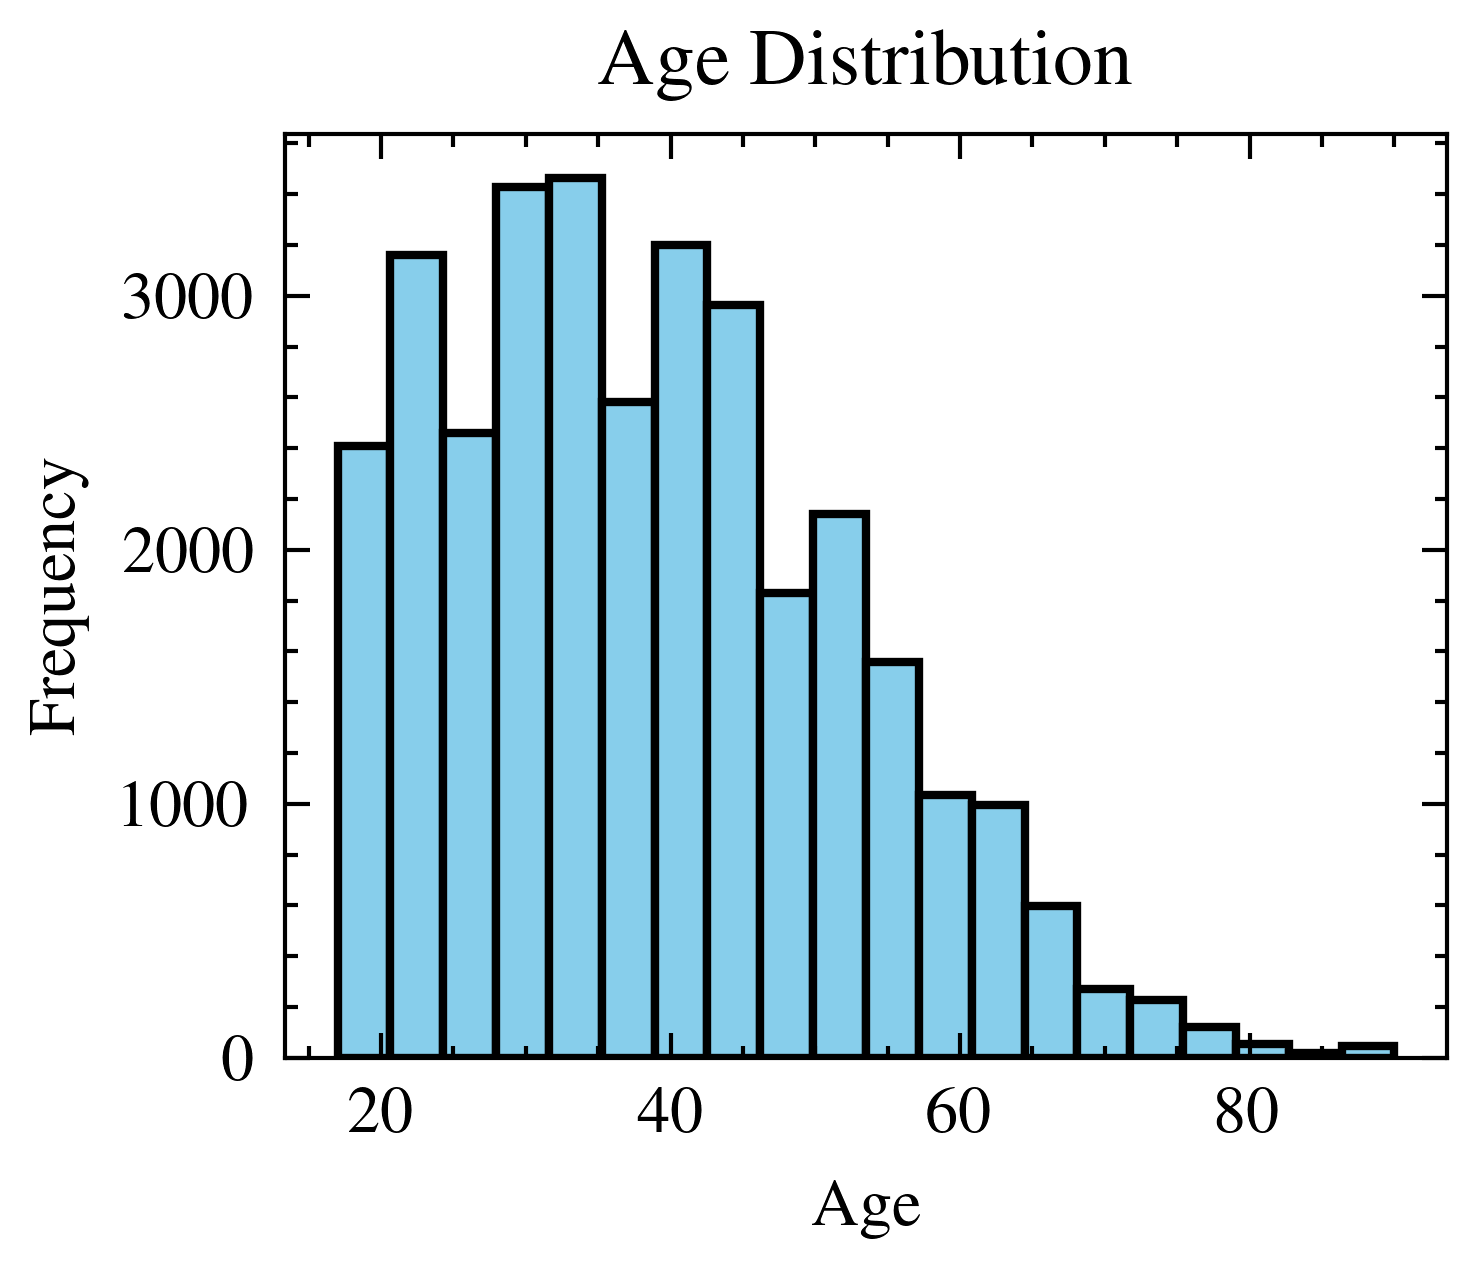

In [26]:
plt.figure(figsize=(2.5, 2))
X['age'].plot(kind='hist', bins=20, title='Age Distribution', color='skyblue', edgecolor='black')

plt.xlabel('Age')

<Axes: title={'center': 'Education Number Distribution'}, ylabel='Frequency'>

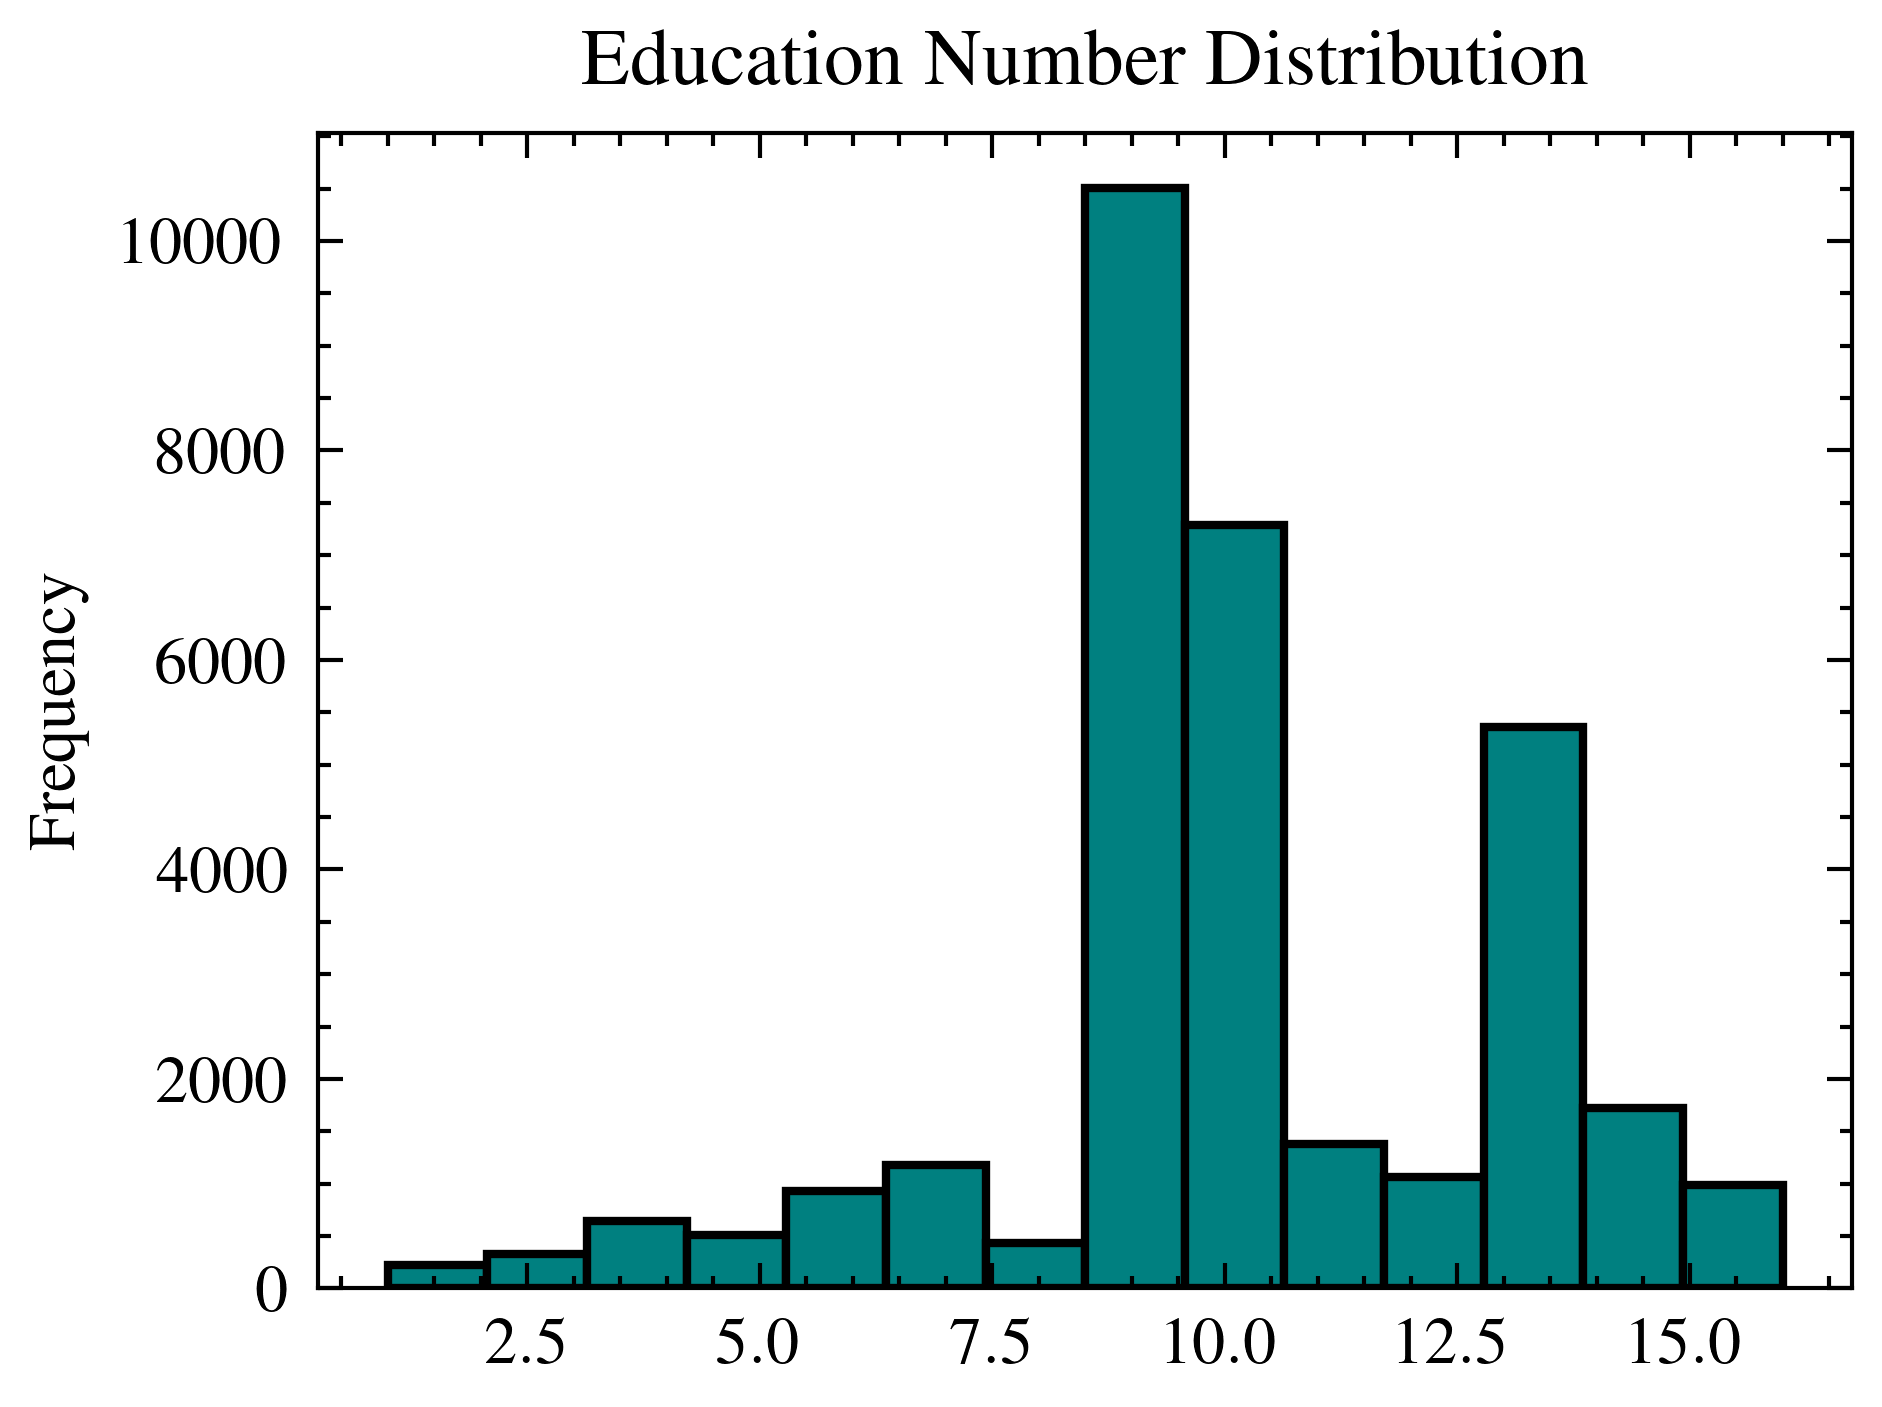

In [23]:
X['education_num'].plot(kind='hist', bins=14, title='Education Number Distribution', color='teal', edgecolor='black')

In [5]:
X['capital-gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

<Axes: title={'center': 'Capital Gain Distribution (Non-Zero)'}, ylabel='Frequency'>

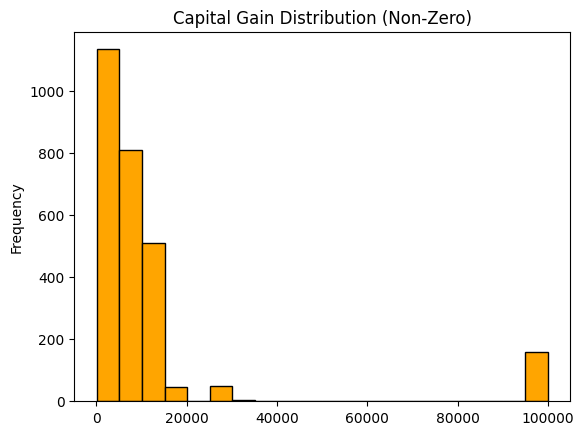

In [6]:
X_non_zero = X[X['capital-gain'] > 0]
X_non_zero['capital-gain'].plot(kind='hist', bins=20, title='Capital Gain Distribution (Non-Zero)', color='orange', edgecolor='black')

<Axes: title={'center': 'Hours per Week Distribution'}, ylabel='Frequency'>

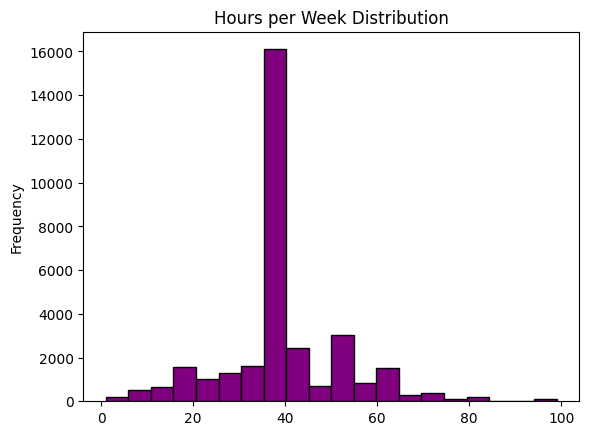

In [7]:
X['hours-per-week'].plot(kind='hist', bins=20, title='Hours per Week Distribution', color='purple', edgecolor='black')

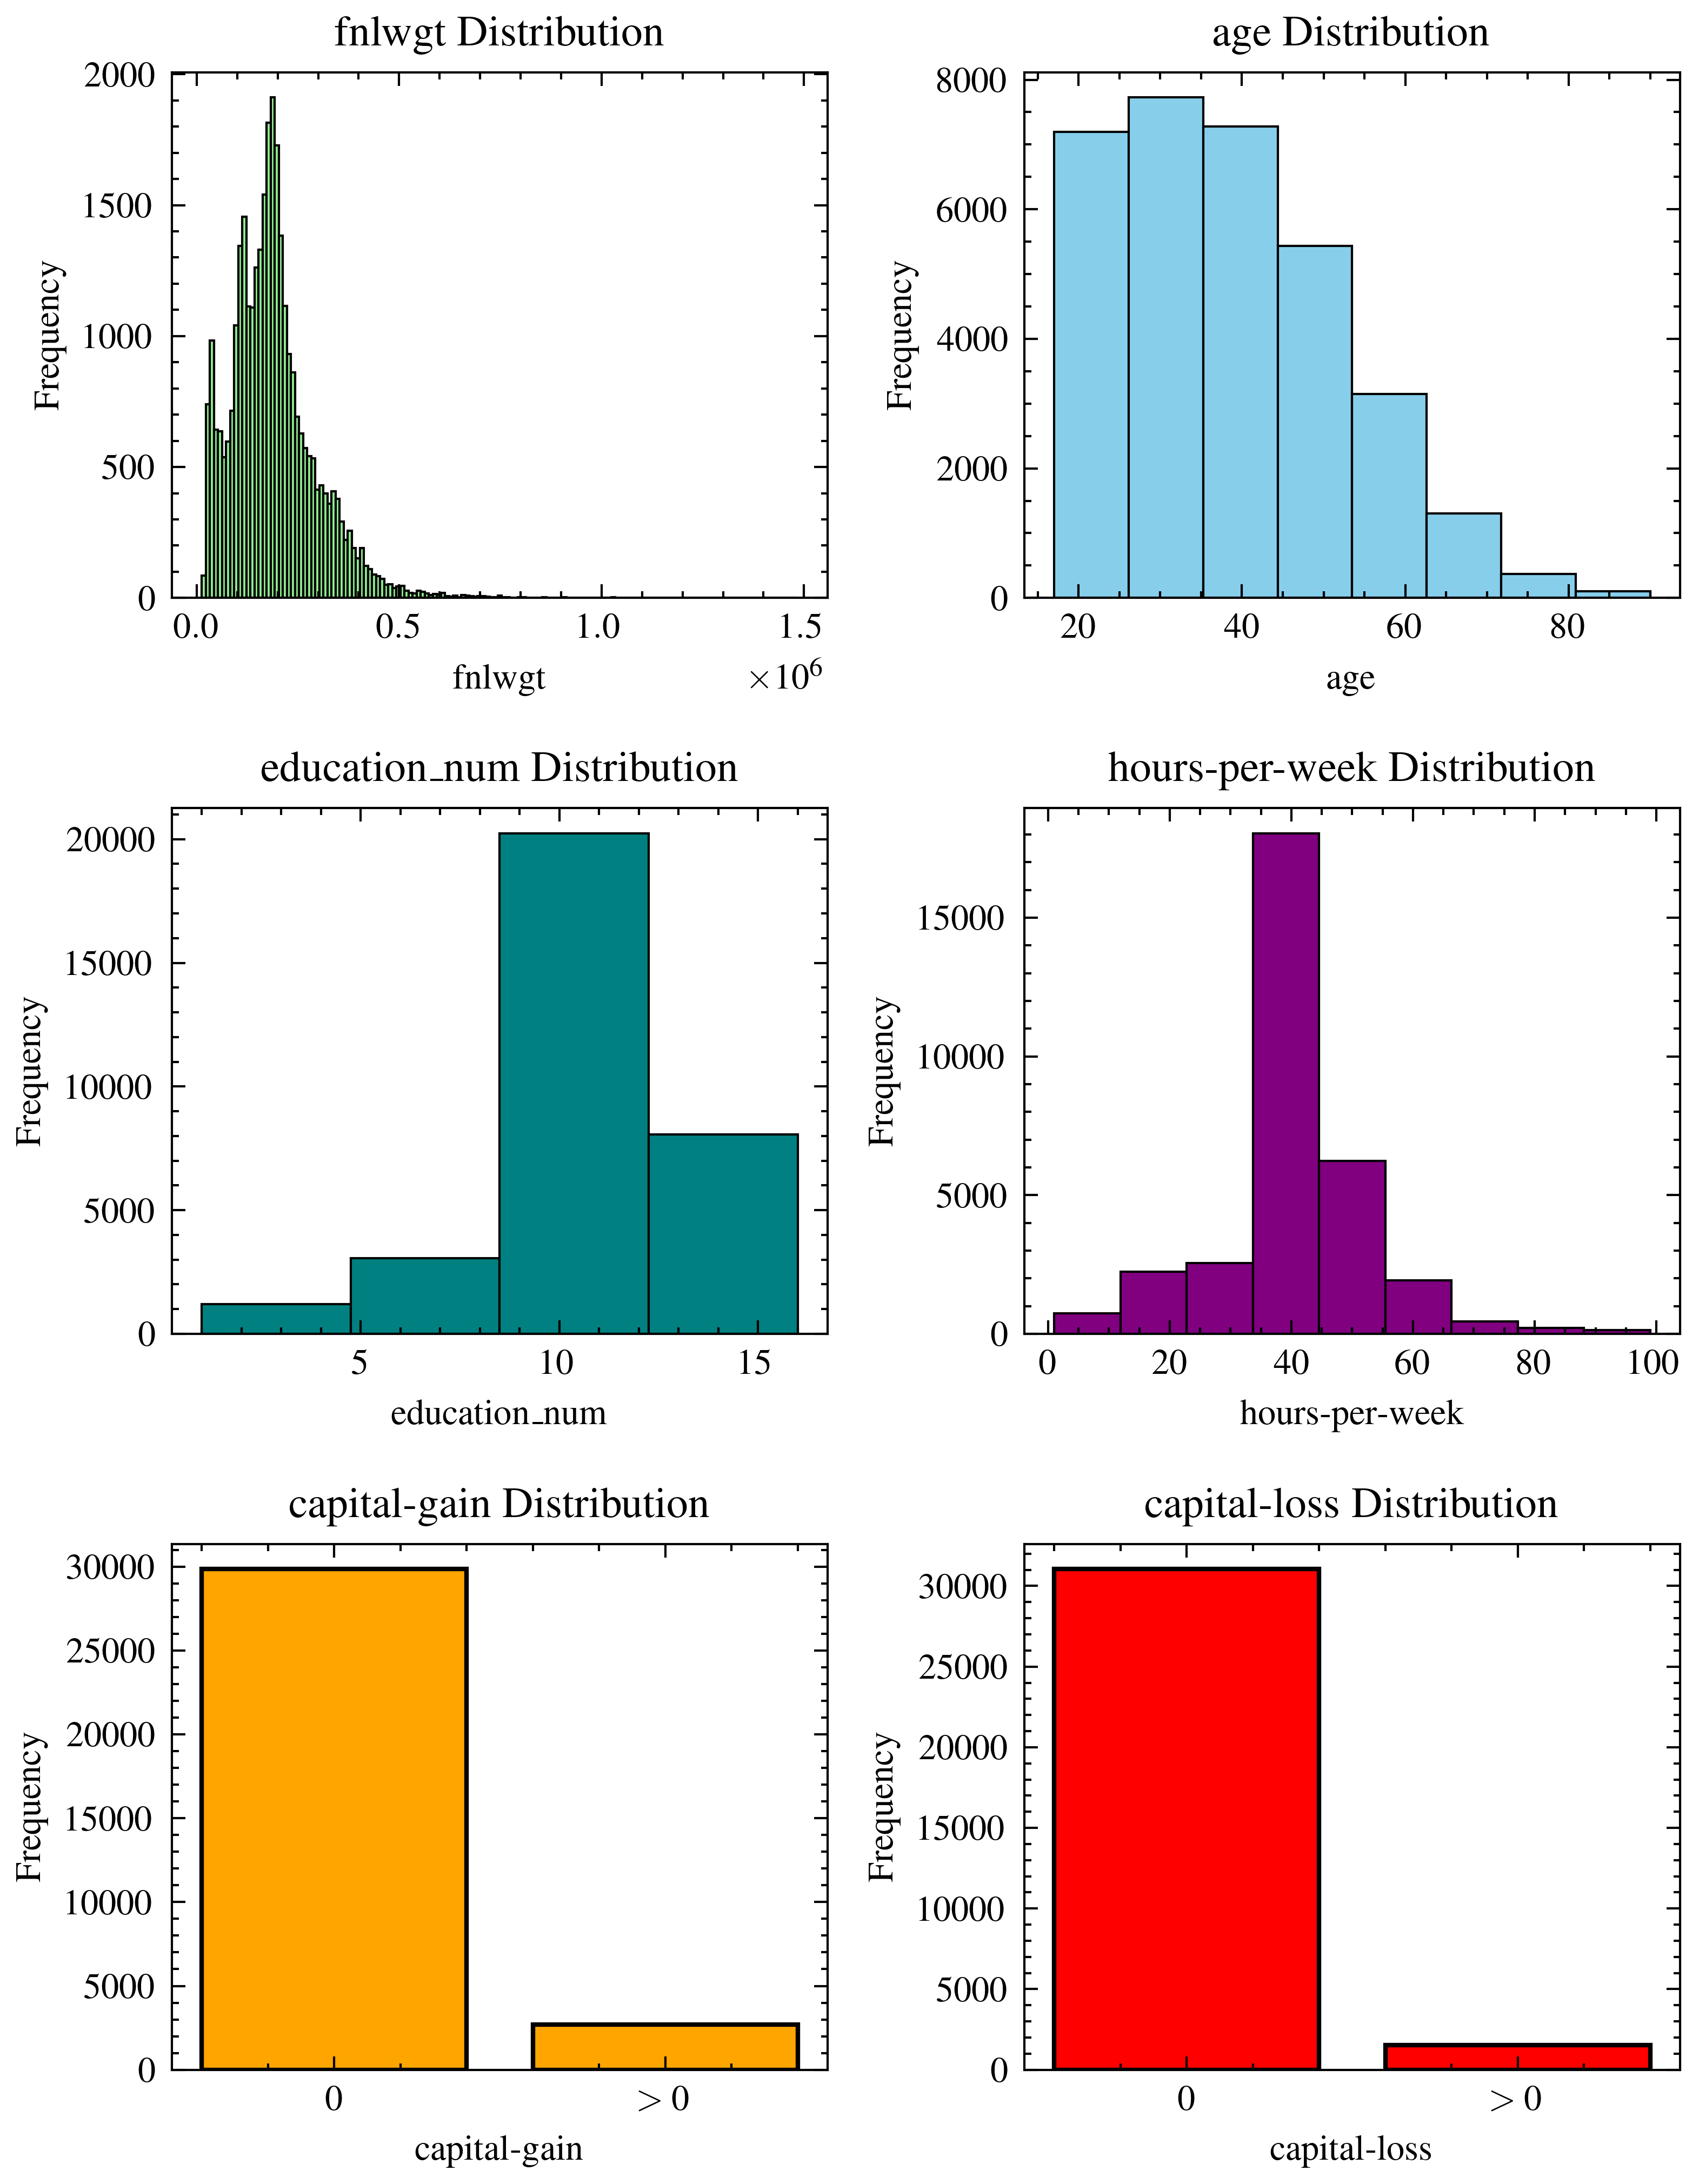

In [50]:
from math import sqrt
import numpy as np


fig, axes = plt.subplots(3, 2, figsize=(6, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

columns = [
    ('fnlwgt', 'lightgreen', 'hist'),
    ('age', 'skyblue', 'hist'),
    ('education_num', 'teal', 'hist'),
    ('hours-per-week', 'purple', 'hist'),
    ('capital-gain', 'orange', 'bar'),
    ('capital-loss', 'red', 'bar')
]

for index, (col, color, type) in enumerate(columns):
    ax = axes[index]

    if type == 'bar':
        equal_zero = X[X[col] == 0][col].count()
        greater_zero = X[X[col] > 0][col].count()

        ax.bar(['$0$', '$>0$'], [equal_zero, greater_zero], color=color, edgecolor='black')
    else:
        unique_values = len(X[col].dropna().unique())
        n_bins = int(sqrt(unique_values))
        X[col].plot(kind='hist', bins=n_bins, 
                color=color, ax=ax, edgecolor='black', linewidth=0.5)

    ax.set_title(f'{col} Distribution')        
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.savefig('../plots/important-vars-distributions.pdf', dpi=300)

In [45]:
unique_values = len(X['capital-loss'].dropna().unique())
unique_values

92